- https://scikit-image.org/docs/stable/api/skimage.io.html#skimage.io.imread
- https://stackoverflow.com/questions/59183192/can-we-load-images-from-image-urls-directly-to-cnn-models-in-keras-tensorflow-wi
- https://www.wga.hu/index_database.html

"Another approach that you could try is to use a sliding window as input instead of the whole image. This way you could take the features of the first layers of any pretrained ImageNet network, that would significantly decrease your training time." https://stats.stackexchange.com/questions/158059/can-neural-network-classify-large-images

### Imports and installations, PATH

In [10]:
path = "/content/drive/MyDrive/main/ART/notebooks/wga/data"

In [ ]:
!pip install "tqdm>=4.9.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from skimage import io
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import os
import requests

from tqdm.auto import tqdm
tqdm.pandas()
import warnings

import tensorflow as tf

### Helper functions

In [ ]:
def label_mapping(label):
  lbl = 0

  if label == "portrait":
    lbl = 1
  elif label == "landscape":
    lbl = 2
  elif label == "mythological":
    lbl = 3
  elif label == "genre":
    lbl = 4
  elif label == "still-life":
    lbl = 5
  elif label == "historical":
    lbl = 6
  elif label == "interior":
    lbl = 7
  elif label == "study":
    lbl = 8
  else:
    lbl = 9

  return lbl

In [ ]:
def transform_URL(URL):
  """Transform URL from old format to new format in order to access jpg."""
  return "https://www.wga.hu/art/" + "/".join(URL.split("/")[-3:-1] + [URL.split("/")[-1].split(".")[0] + ".jpg"])

In [ ]:
def load_img(URL):
  """Load an image from an URL, if found, and turn into RGB format."""
  image = io.imread(URL)
  RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGBA)
  return RGB_img

In [ ]:
def resize_img(img, new_width = 300, new_height = 300):
  """Resize an image using new  width and height"""
  new_points = (new_width, new_height)
  return cv2.resize(img, new_points, interpolation= cv2.INTER_LINEAR)

In [ ]:
def url_to_numpy(url):
  try:
    img = load_img(url)
    resized_img = resize_img(img)
    numpy_img = np.expand_dims(resized_img[:,:,:-1], axis=0)[:,:,:,::-1]

    assert numpy_img.shape[-1] == 3

    return numpy_img

  except Exception:
    pass


# def url_to_tensor(url):
#   try:
#     img = load_img(url)
#     resized_img = resize_img(img) # resize them to same shape before concatenation
#     tensor = tf.convert_to_tensor(resized_img)
#     input_tensor = tf.expand_dims(tensor, axis=0)

#     if np.all(np.ravel(tf.gather(input_tensor, indices=[3], axis=3).numpy()) == 255):
#       input_tensor = tf.gather(input_tensor, indices=[2,1,0], axis=3)
#     assert input_tensor.shape[-1] == 3

#     return input_tensor

#   except Exception:
#     pass

In [ ]:
def initialize_master_numpy(start=0):
  first_numpy = url_to_numpy(paintings.loc[start, "new_URL"])
  second_numpy = url_to_numpy(paintings.loc[start + 1, "new_URL"])

  while first_numpy is None or second_numpy is None:
    start += 1
    first_numpy = url_to_numpy(paintings.loc[start, "new_URL"])
    second_numpy = url_to_numpy(paintings.loc[start + 1, "new_URL"])

  return np.concatenate((first_numpy, second_numpy), axis=0)
  

# def initialize_master_tensor():
#   first_tensor = url_to_tensor(paintings.loc[0, "new_URL"])
#   second_tensor = url_to_tensor(paintings.loc[1, "new_URL"])

#   return tf.concat([first_tensor, second_tensor], axis=0)

#### Bad methods

In [ ]:
# # ne radi: ne mijenja bgr -> rgb, ne mijenja width x height

# def read_tensor_from_image_url(url,
#                                input_height=299,
#                                input_width=299,
#                                input_mean=0,
#                                input_std=255):
#     try:
#       image_reader = tf.image.decode_jpeg(
#           requests.get(url).content, channels=3, name="jpeg_reader")
#       float_caster = tf.cast(image_reader, tf.float32)
#       dims_expander = tf.expand_dims(float_caster, 0)
#       resized = tf.image.resize(dims_expander, [input_height, input_width])
#       # normalized = tf.divide(tf.subtract(resized, [input_mean]), [input_std])
#       return resized
#     except Exception:
#       pass


# # napuniti folder slikama s urla
# # predugo traje i nema potrebe spremati slike kad moyemo spremiti tenzor slika
# warning_counter, exception_counter, sucess_counter = 0, 0, 0
# images = []

# def url_to_img(url):
#   global warning_counter
#   global exception_counter
#   global sucess_counter
#   try:
#     img_array = io.imread(url)
#     images.append(img_array)
#     # im = Image.fromarray(img_array)
#     name = "_".join(url.split("/")[-3:])
#     # im.save(os.path.join(path, "images", name))
#     sucess_counter += 1
#     print(name)
#   except UserWarning as e:
#     warning_counter += 1
#     print(e)
#   except Exception: # za slike kojima se promijenio url
#     exception_counter += 1
#     pass

#### Examples

url example:
- old = "https://www.wga.hu/frames-e.html?/html/a/aachen/adonis.html"
- new = "https://www.wga.hu/art/a/aachen/adonis.jpg"


- example = "https://www.wga.hu/art/a/aachen/allegory.jpg"
- example = "https://www.wga.hu/art/a/aachen/z_scene.jpg"

In [ ]:
# Example url
image = io.imread('https://www.wga.hu/art/a/aachen/z_scene.jpg')
RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGBA)

# Display image
cv2_imshow(RGB_img)
# cv2.waitKey()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
image.shape

(1168, 1370, 3)

In [ ]:
RGB_img.shape

(1168, 1370, 4)

In [ ]:
RGB_img[0]

array([[ 29,  35,  40, 255],
       [ 25,  31,  36, 255],
       [ 25,  31,  36, 255],
       ...,
       [ 52,  57,  60, 255],
       [ 45,  50,  53, 255],
       [ 45,  50,  53, 255]], dtype=uint8)

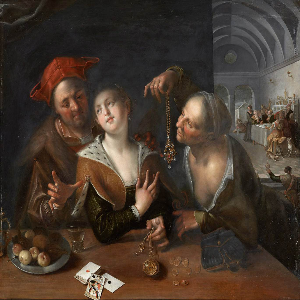

In [ ]:
new_img = resize_img(load_img('https://www.wga.hu/art/a/aachen/z_scene.jpg'))
cv2_imshow(new_img)

In [ ]:
new_img.shape

(300, 300, 4)

In [ ]:
tf.convert_to_tensor(new_img)

<tf.Tensor: shape=(300, 300, 4), dtype=uint8, numpy=
array([[[ 33,  39,  45, 255],
        [ 24,  30,  35, 255],
        [ 15,  21,  26, 255],
        ...,
        [ 47,  50,  55, 255],
        [ 71,  77,  80, 255],
        [ 42,  48,  51, 255]],

       [[ 31,  37,  42, 255],
        [ 39,  45,  50, 255],
        [ 30,  36,  41, 255],
        ...,
        [ 42,  46,  51, 255],
        [ 37,  49,  54, 255],
        [ 31,  44,  49, 255]],

       [[ 27,  33,  38, 255],
        [ 31,  37,  42, 255],
        [ 20,  26,  32, 255],
        ...,
        [ 33,  42,  46, 255],
        [ 32,  44,  52, 255],
        [ 36,  49,  56, 255]],

       ...,

       [[ 42,  79, 112, 255],
        [ 44,  81, 114, 255],
        [ 41,  78, 111, 255],
        ...,
        [ 27,  51,  88, 255],
        [ 34,  51,  86, 255],
        [ 27,  43,  79, 255]],

       [[ 32,  56, 102, 255],
        [ 37,  61, 106, 255],
        [ 43,  68, 113, 255],
        ...,
        [ 32,  54,  87, 255],
        [ 41,  56,  8

In [ ]:
img = load_img('https://www.wga.hu/art/a/aachen/j_couple.jpg')
# cv2_imshow(img)

In [ ]:
tensor = tf.convert_to_tensor(img) # dtype=tf.dtypes.float32
input_tensor = tf.expand_dims(tensor, axis=0) # add another dimension at the front to get NHWC shape

# ako je ovo True, onda su svi elementi na 4 dimenziji tenzora jednaki 255
if np.all(np.ravel(tf.gather(input_tensor, indices=[3], axis=3).numpy()) == 255):
  input_tensor = tf.gather(input_tensor, indices=[2,1,0], axis=3)
assert input_tensor.shape[-1] == 3 # trebao bi biti (1,x,y,3)

# arr_ = np.squeeze(input_tensor)
# plt.imshow(arr_)
# plt.show()

### Data import and preparation

In [ ]:
# !unzip -u /content/drive/MyDrive/main/ART/notebooks/original_data/wga_xls.zip -d /content/drive/MyDrive/main/ART/notebooks/wga/data

In [ ]:
# data = pd.read_excel(os.path.join(path, "catalog.xlsx"))

In [ ]:
# data.loc[1]

In [ ]:
# data["new_URL"] = data["URL"].apply(transform_URL)
# data.drop(["BORN-DIED",	"TITLE",	"DATE",	"TECHNIQUE",	"LOCATION",	"SCHOOL",	"TIMEFRAME"], axis=1, inplace=True)

- filter by from==painting
- count every column

In [ ]:
# data['FORM'].value_counts()

In [ ]:
# paintings = data.loc[data['FORM'] == "painting"]
# paintings.reset_index(inplace=True, drop=True)

In [ ]:
# name = "paintings.csv"
# paintings.to_csv(os.path.join(path, name), index=False)

In [ ]:
# paintings['TYPE'].value_counts()

- label = TYPE
- images = new_URL

- probat sve na jednoj slici pa onda primijenit na sve

1. skinit fileove s linkova na drive
2. (otkrit corrupt exif - pobrojat ih)
3. (popravit corrupt exif)

In [ ]:
# paintings["new_URL"].apply(url_to_img)

### Creating a dataset

In [12]:
paintings = pd.read_csv(os.path.join(path, "paintings.csv"))
paintings.head(2)

,AUTHOR,URL,FORM,TYPE,new_URL
0,"AACHEN, Hans von",https://www.wga.hu/html/a/aachen/adonis.html,painting,mythological,https://www.wga.hu/art/a/aachen/adonis.jpg
1,"AACHEN, Hans von",https://www.wga.hu/html/a/aachen/allegory.html,painting,mythological,https://www.wga.hu/art/a/aachen/allegory.jpg


In [ ]:
paintings["encoded_TYPE"] = paintings["TYPE"].progress_map(label_mapping)

  0%|          | 0/32438 [00:00<?, ?it/s]

In [ ]:
# tqdm.pandas()

# images = paintings["new_URL"].progress_map(read_tensor_from_image_url)

In [ ]:
paintings["TYPE"].value_counts()

religious       13517
portrait         4810
landscape        4103
mythological     3202
genre            2772
still-life       1405
other             970
historical        943
interior          636
study              80
Name: TYPE, dtype: int64

In [13]:
paintings["TYPE"].value_counts().reset_index().to_csv(os.path.join(path, "TYPE_value_counts.csv"), index=False)

In [ ]:
# # uvijek pokrenuti inicijalizaciju prije kreiranja
# master_tensor = initialize_master_tensor()
# labels_index_mask = np.zeros(paintings.shape[0])
# current_index = 2 # pocinjemo od druge slike

# def make_master_tensor(url):
#   global master_tensor
#   current_tensor = url_to_tensor(url)
#   if not current_tensor == None:
#     master_tensor = tf.concat([master_tensor, current_tensor], axis=0)

In [ ]:
# print(paintings["new_URL"][-2:])

# # provjera spaja li se None u master_tensor (None je na poziciji -2)
# paintings["new_URL"][-2:].progress_map(make_master_tensor) # zalijepi zadnje dvije (ako su not None) na postojeci 2-clani master_tensor

# # ako je prva dimenzija 3, onda je sve dobro (3 su not None slike)
# print(master_tensor.shape)

https://www.loc.gov/preservation/digital/formats/content/tiff_tags.shtml

https://www.awaresystems.be/imaging/tiff/tifftags/iptc.html

In [ ]:
# temp = paintings[["new_URL", "encoded_TYPE"]].copy()
# temp.to_csv(os.path.join(path, "temp.csv"), index=False)

In [ ]:
master_numpy = initialize_master_numpy()
labels_index_mask = np.zeros(paintings.shape[0], dtype=bool)
current_index = 2

def make_master_numpy(url):
  global master_numpy
  global labels_index_mask
  global current_index

  current_numpy = url_to_numpy(url)

  if current_numpy is not None:
    labels_index_mask[current_index] = True
    master_numpy = np.concatenate((master_numpy, current_numpy), axis=0)
    current_index += 1

/usr/local/lib/python3.9/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


In [ ]:
# paintings["new_URL"][2:].progress_map(make_master_numpy)

# labels_numpy = np.array(paintings["encoded_TYPE"])[labels_index_mask]

# np.save('/content/drive/MyDrive/main/ART/notebooks/wga/wga_images_numpy.npy', master_numpy)
# np.save('/content/drive/MyDrive/main/ART/notebooks/wga/wga_labels_numpy.npy', labels_numpy)

  0%|          | 0/32436 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/PIL/TiffImagePlugin.py:625: UserWarning: Metadata Warning, tag 33723 had too many entries: 2, expected 1
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/PIL/TiffImagePlugin.py:625: UserWarning: Metadata Warning, tag 33723 had too many entries: 8, expected 1
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/PIL/TiffImagePlugin.py:625: UserWarning: Metadata Warning, tag 33723 had too many entries: 12, expected 1
  warnings.warn(


In [ ]:
# paintings["new_URL"][2:].progress_map(make_master_tensor)

# tensor_path = path + '/master_tensor'
# dataset = tf.data.Dataset.from_tensor_slices(master_tensor)
# dataset.save(tensor_path)

In [ ]:
# np.save('/content/drive/MyDrive/main/ART/notebooks/wga/master_tensor.npy', master_tensor.numpy())